# Проект по исследовательскому анализу данных:<br>**«Исследование объявлений о продаже квартир»**



В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Загрузка файла с данными и изучие общей информации

### Импорт библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)

### Загрузка данных и вывод общей информации

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


### Постоение общей гистограммы

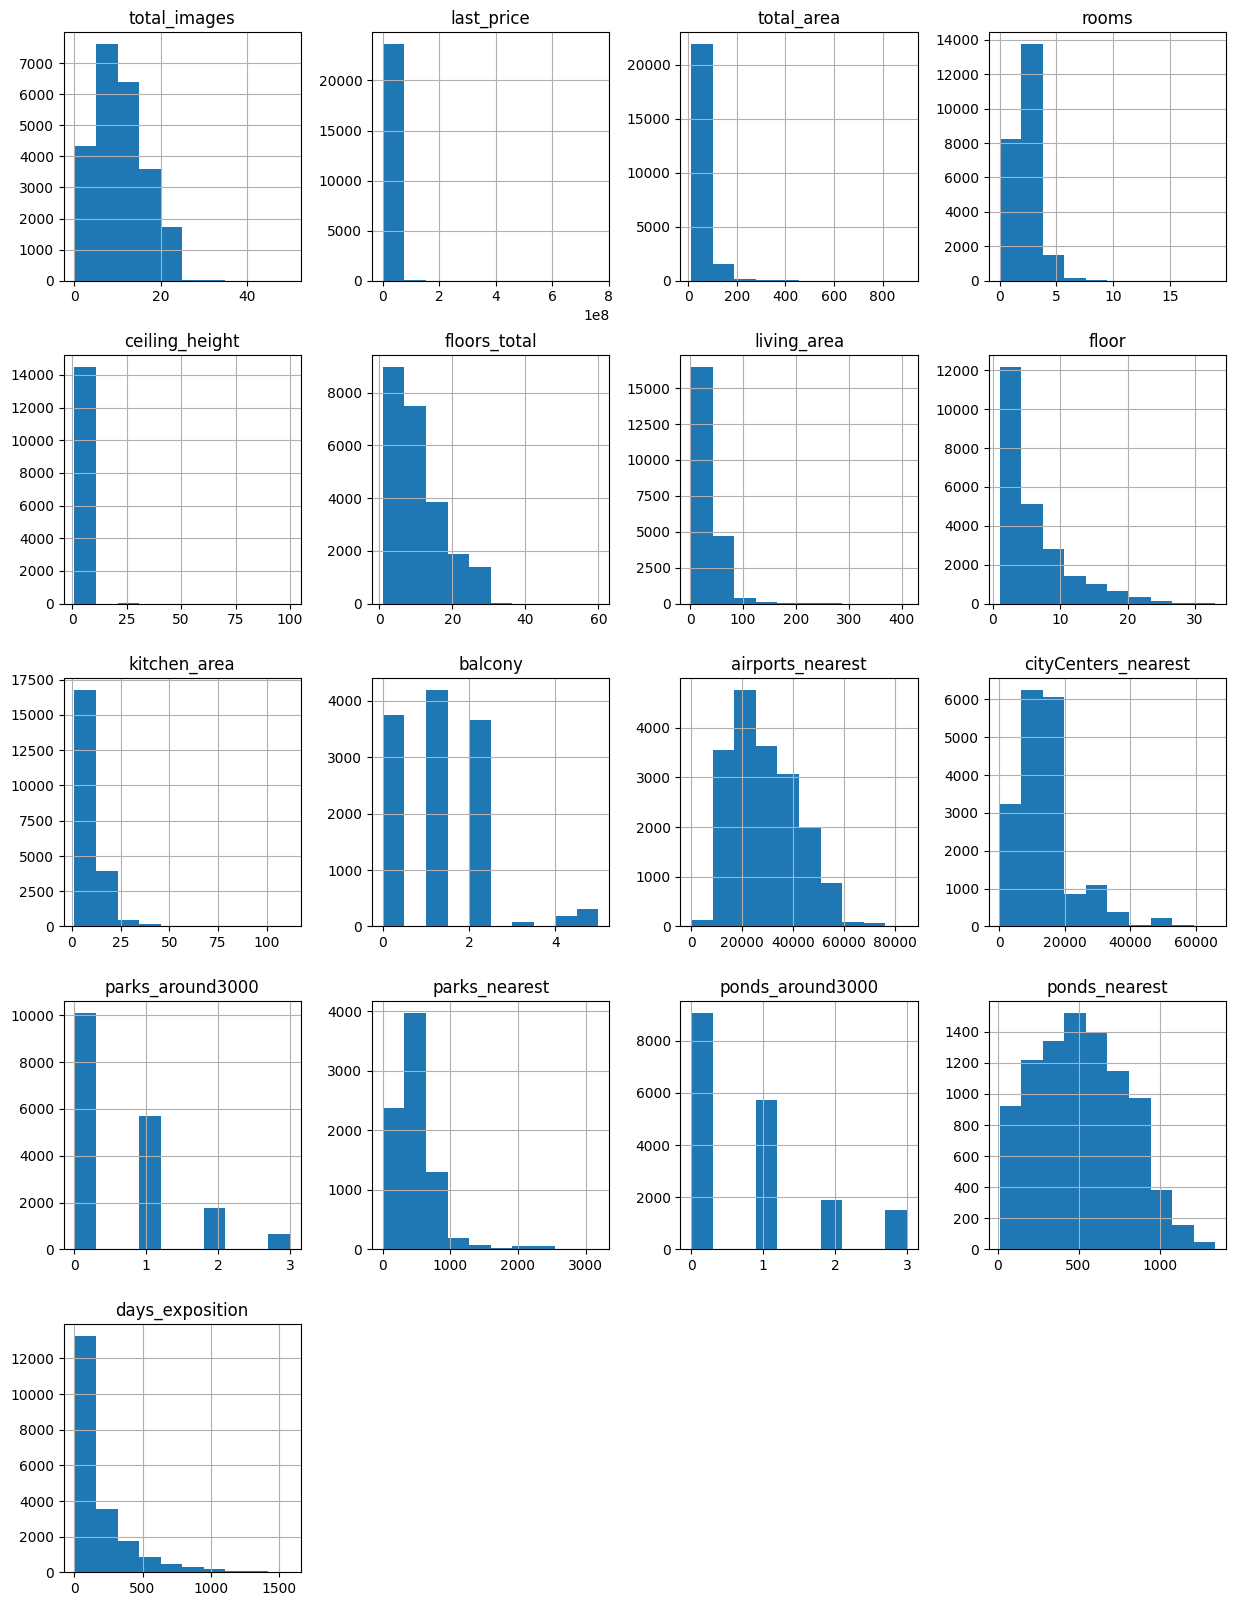

In [ ]:
data.hist(figsize=(15, 20));

### Вывод

По первичному осмотру можно сделать вывод о неправильных типах данных, например, тип данных `object` в колонке `is_apartment` вместо `bool`, также на графиках видны аномалии, например, в колонке `ceiling_height` есть значения высоты потолков до 100 м. Эти и другие ошибки будут обработаны в Шаге 2.

## Предобработка данных

### Приведение названий столбцов к snake_case


In [7]:
data = data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'})

### Обработка пропусков

Список с долей пропусков в датафрейме:

In [8]:
data.isna().mean()

,0
total_images,0.00
last_price,0.00
total_area,0.00
first_day_exposition,0.00
rooms,0.00
ceiling_height,0.39
floors_total,0.00
living_area,0.08
floor,0.00
is_apartment,0.88


Замена пропусков в столбце `balcony`, где указано количество балконов:

In [9]:
data['balcony'] = data['balcony'].fillna(0)

Значения с пропуском балконов были заменены на `0`, так как логично предположить, что при отсутствии балконов, многими пользователями, поле не заполнялось. Видимо поле с обозначением количества балконов не является обязательным.

Замена пропуски в столбце `is_apartment`, где указано является ли жилье апартаментами:

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)

По аналогии с балконами, можно предположить, что поле с обозначением аппартаментов тоже не являлось обязательным и заменить все пропуски на `False`. При этом тип данны в колонке `is_apartment` измениться с `object` на правильный тип данных `bool`.

Замена пропуски в столбце `locality_name`, с наименованиями населенных пунктов:

In [11]:
data['locality_name'] = data['locality_name'].fillna('Нет данных')

Для дальнейшей работы с данными в колонке `locality_name` (Имя населенного пункта), нужно привести все данные к одному типу и избавиться от значений `NaN`, заменив их на `Нет данных`. Отсутствие данных в этой колонке может быть связано с технической ошибкой, багом или необязательностью заполнения поля (что вряд ли).

In [12]:
data.isna().mean()

,0
total_images,0.00
last_price,0.00
total_area,0.00
first_day_exposition,0.00
rooms,0.00
ceiling_height,0.39
floors_total,0.00
living_area,0.08
floor,0.00
is_apartment,0.00


### Установка корректного типа данных

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Привидем поля `first_day_exposition` к формату `datetime` из формата `object`:

In [14]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'],
    format='%Y-%m-%dT%H:%M:%S'
)

### Обработка дубликатов

In [15]:
data.duplicated().sum()

0

Явные дубликаты не обнаружены.

Поиск неявных дубликатов:

Выведем уникальные названия населенных пунктов и узнаем их количество:

In [16]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [17]:
data['locality_name'].nunique()

365

Приведем топоним «посёлок» к общему виду (написание через «ё»):

In [18]:
data['locality_name'] = data['locality_name'].apply(lambda x: x.replace('поселок', 'посёлок'))

Найдем дубликаты в названиях населенных пунктов:

In [19]:
uniq_loc_name = pd.Series(data['locality_name'].unique())

res = []
for i in uniq_loc_name:
    name = i.replace('посёлок', "").replace('городской', "").replace('городского', "").replace('типа', "").replace('село', "").strip()
    res.append(name)

uniq_loc_name = pd.Series(res)
print(uniq_loc_name.value_counts().head(15))

Павлово          3
Любань           2
Мга              2
Большая Ижора    2
Мурино           2
Никольское       2
Советский        2
Лесогорский      2
Назия            2
Рощино           2
Рябово           2
Жилгородок       1
Почап            1
Гончарово        1
Новый Учхоз      1
Name: count, dtype: int64


Заменим все дубликаты, правильные топонимы населенных пунктов возьмем из Википедии. Никольское и Любань не являются дубликатами, так как есть одноименные города и села:

In [20]:
data['locality_name'] = (
    data['locality_name']
    .replace(['село Павлово', 'городской посёлок Павлово'], 'посёлок городского типа Павлово', regex=True)
    .replace('городской посёлок Назия', 'посёлок городского типа Назия')
    .replace('посёлок Мурино', 'Мурино')
    .replace('посёлок городского типа Большая Ижора', 'городской посёлок Большая Ижора')
    .replace('городской посёлок Советский', 'посёлок городского типа Советский')
    .replace('посёлок городского типа Мга', 'городской посёлок Мга')
    .replace(['посёлок городского типа Рощино', 'городской посёлок Рощино'], 'посёлок Рощино', regex=True)
    .replace('посёлок Рябово', 'посёлок городского типа Рябово')
    .replace('городской посёлок Лесогорский', 'посёлок городского типа Лесогорский')
)

Проверим количестов населенных пунктов еще раз:

In [21]:
data['locality_name'].nunique()

321

Было выявлено и устранено 44 дубликата в названиях населеных пунктов.

### Вывод

Была проведена работа по изменению типов данных и устранению дубликатов.
 - Пропуски в поле `days_exposition` и в полях с геоданными должны заполняться автоматическии, скорее всего они вызваны технической неисправностью или багами и логическому заполнению не подлежат.
 - Не корректный тип данных возможно был вызван ошибкой при выгрузке или переносе данных.

In [22]:
data.isna().mean()

,0
total_images,0.00
last_price,0.00
total_area,0.00
first_day_exposition,0.00
rooms,0.00
ceiling_height,0.39
floors_total,0.00
living_area,0.08
floor,0.00
is_apartment,0.00


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

## Создание новых признаков

Создание признака с ценой за м2:

In [24]:
data['m_price'] = data['last_price'] / data['total_area']

In [25]:
data['m_price'] = data['m_price'].round(2)

Создание признака с днем недели публикации:

In [26]:
data['weekday_exposition'] = data['first_day_exposition'].apply(lambda x: x.weekday())

In [27]:
data['weekday_exposition']

,weekday_exposition
0,3
1,1
2,3
3,4
4,1
...,...
23694,1
23695,0
23696,6
23697,1


Создание признака с месяцем публикации:

In [28]:
data['month_exposition'] = data['first_day_exposition'].apply(lambda x: x.month)

In [29]:
data['month_exposition']

,month_exposition
0,3
1,12
2,8
3,7
4,6
...,...
23694,3
23695,1
23696,2
23697,3


Создание признака с годом публикации:

In [30]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [31]:
data['year_exposition']

,year_exposition
0,2019
1,2018
2,2015
3,2015
4,2018
...,...
23694,2017
23695,2018
23696,2018
23697,2017


Создание признака с типом этажа:

In [32]:
def floor_type():
    res = []
    for i in range(len(data['floor'])):
        if data['floor'][i] == 1:
            res.append("первый")
        elif data['floor'][i] == data['floors_total'][i]:
            res.append("последний")
        else:
            res.append("другой")
    return res

In [33]:
def floor_type_categorize(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [34]:
data['floor_type'] = data.apply(floor_type_categorize, axis=1)

In [35]:
data['floor_type'].value_counts()

,count
floor_type,
другой,17446
последний,3336
первый,2917


In [36]:
data['floor_type'].head()

,floor_type
0,другой
1,первый
2,другой
3,другой
4,другой


Создание признака с расстоянием до центра в км:

In [37]:
def centers_km():
    res = []
    for i in range(len(data['city_centers_nearest'])):
        try:
            res.append(round(data['city_centers_nearest'][i] / 1000))
        except:
            res.append(data['city_centers_nearest'][i])
    return res

In [38]:
data['city_centers_km'] = centers_km()

In [39]:
data['city_centers_km'].head()

,city_centers_km
0,16.00
1,19.00
2,14.00
3,7.00
4,8.00


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Вывод

В результате этого шага в датафрейм были добавлены следующие параметры:
 - цена одного квадратного метра;
 - номер дня недели публикации объявления;
 - месяц публикации объявления;
 - год публикации объявления;
 - тип этажа квартиры;
 - расстояние до центра города в километрах.

## Исследовательский анализ данных

### Обработка аномалий

Стоимость объекта:

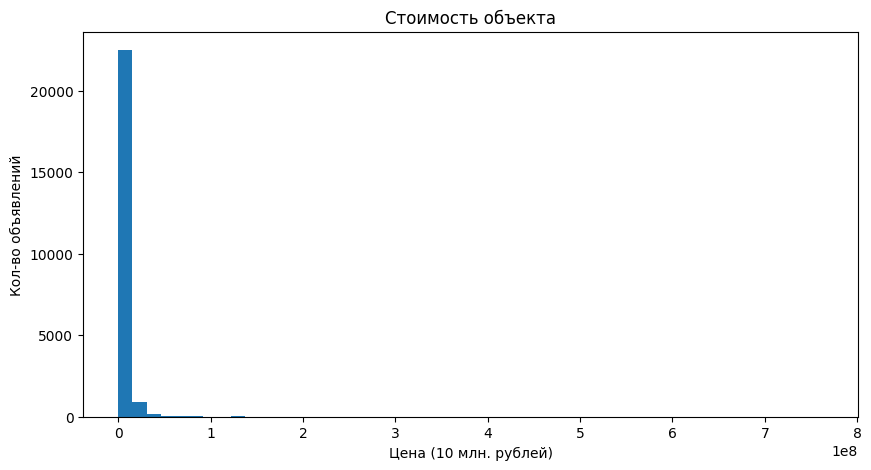

In [41]:
data['last_price'].plot(kind='hist',
                        bins=50,
                        figsize=(10, 5),
                        title='Стоимость объекта')

plt.xlabel('Цена (10 млн. рублей)')
plt.ylabel('Кол-во объявлений');

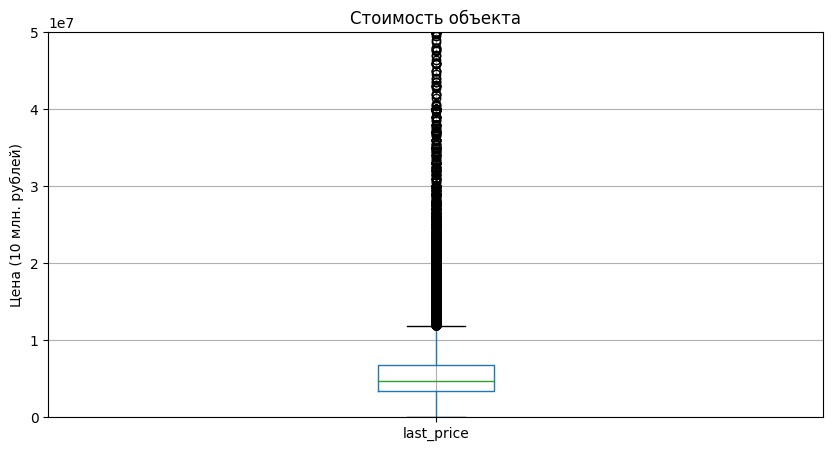

In [42]:
data.boxplot('last_price',
             figsize=(10, 5))

plt.title('Стоимость объекта')
plt.ylabel('Цена (10 млн. рублей)')
plt.ylim(0, 50000000);

Выведем описание данных:

In [43]:
data['last_price'].describe()

,last_price
count,"23,699.00"
mean,"6,541,548.77"
std,"10,887,013.27"
min,"12,190.00"
25%,"3,400,000.00"
50%,"4,650,000.00"
75%,"6,800,000.00"
max,"763,000,000.00"


Уменьшим масштаб:

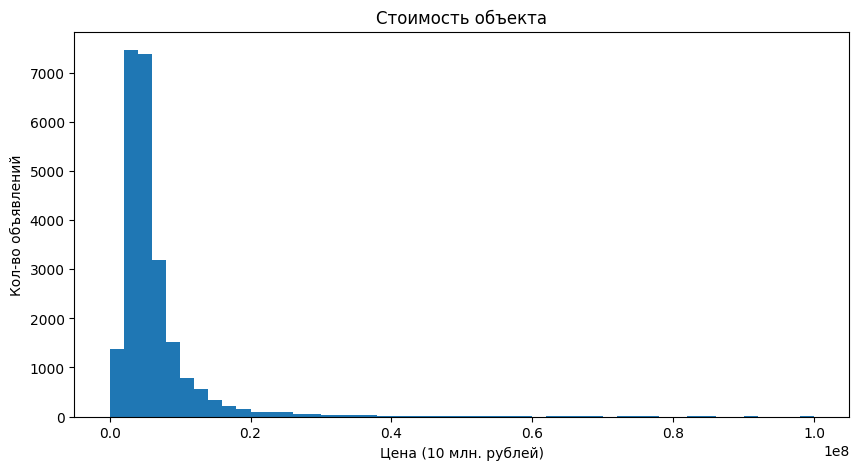

In [44]:
data['last_price'].plot(kind='hist',
                        bins=50,
                        figsize=(10, 5),
                        range=(0, 100000000),
                        title='Стоимость объекта')

plt.xlabel('Цена (10 млн. рублей)')
plt.ylabel('Кол-во объявлений');

In [45]:
len(data.query('last_price > 40000000'))

182

На графиках выше видно, что пик стоимости квартир приходиться на значение до 5 млн рублей, однако есть выбросы вплоть до 763 млн, стандартное отклонение значительно. После 40 млн рублей, объявлений почти нет. Можно убрать все объявления выше 40 млн рублей, доля таких объявлений меньше 1% (182 шт).

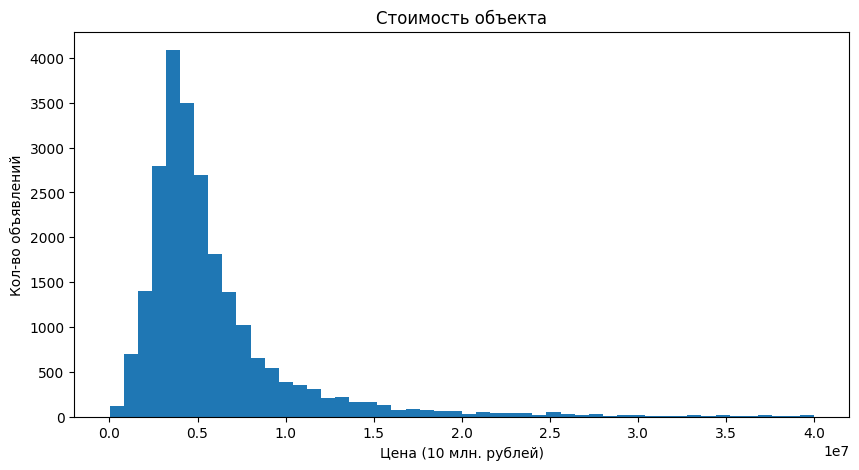

In [46]:
data = data.query('last_price <= 40000000').reset_index(drop=True)
data['last_price'].plot(kind='hist',
                        bins=50,
                        figsize=(10, 5),
                        title='Стоимость объекта')

plt.xlabel('Цена (10 млн. рублей)')
plt.ylabel('Кол-во объявлений');

На данном этапе будут обработаны или убраны очень редкие или сильно выбивающиеся значения (выбросы).

Высота потолков:

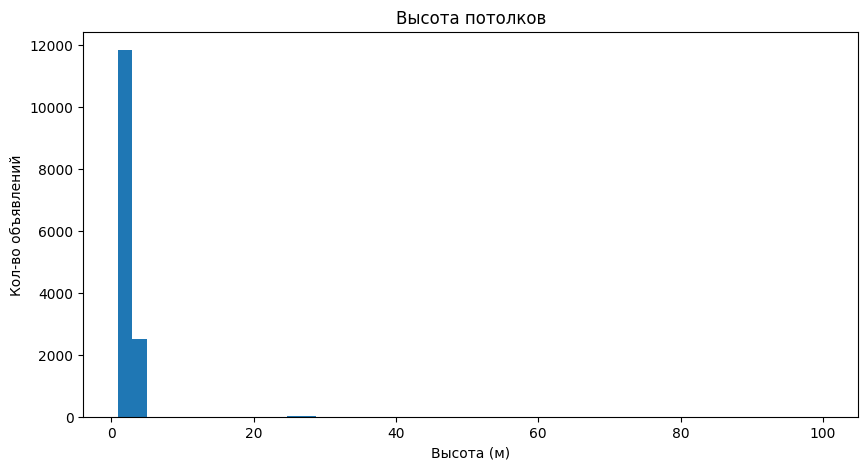

In [47]:
data['ceiling_height'].plot(kind='hist',
                        bins=50,
                        figsize=(10, 5),
                        title='Высота потолков')

plt.xlabel('Высота (м)')
plt.ylabel('Кол-во объявлений');

На гистограмме видно, что есть выбросы, с высотой потолка до 100 м. Предположим, что высота потолков ниже 2 метров и выше 5 метров, выглядит маловероятной, выведем список таких объявлений:

In [48]:
data.query('ceiling_height > 5 or ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m_price,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_km
352,17,"3,600,000.00",55.20,2018-07-12,2,25.00,5.00,32.00,2,False,False,False,NaN,2.00,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.00,"65,217.39",3,7,2018,другой,NaN
3116,14,"2,900,000.00",75.00,2018-11-12,3,32.00,3.00,53.00,2,False,False,False,8.00,0.00,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"38,666.67",0,11,2018,другой,NaN
3442,3,"1,400,000.00",30.00,2018-03-16,1,8.00,5.00,15.30,2,False,False,False,7.30,0.00,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.00,"46,666.67",4,3,2018,другой,NaN
4609,0,"4,300,000.00",45.00,2018-02-01,2,25.00,9.00,30.00,2,False,False,False,7.00,1.00,Санкт-Петербург,"12,016.00","13,256.00",1.00,658.00,1.00,331.00,181.00,"95,555.56",3,2,2018,другой,13.00
4841,7,"3,000,000.00",25.00,2017-09-27,0,27.00,25.00,17.00,17,False,False,True,NaN,2.00,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.00,"120,000.00",2,9,2017,другой,NaN
5039,0,"3,850,000.00",30.50,2018-10-03,1,24.00,5.00,19.50,1,True,False,False,5.50,0.00,Санкт-Петербург,"29,686.00","8,389.00",3.00,397.00,1.00,578.00,7.00,"126,229.51",2,10,2018,первый,8.00
5208,0,"2,500,000.00",54.00,2017-10-13,2,27.00,5.00,30.00,3,False,False,False,9.00,2.00,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.00,"46,296.30",4,10,2017,другой,NaN
5626,4,"4,400,000.00",50.00,2017-08-08,2,26.00,9.00,21.30,3,False,False,False,7.00,2.00,Санкт-Петербург,"28,981.00","10,912.00",1.00,305.00,0.00,NaN,267.00,"88,000.00",1,8,2017,другой,11.00
5669,5,"1,500,000.00",42.80,2017-08-14,2,1.20,2.00,27.50,1,False,False,False,5.20,0.00,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.00,"35,046.73",0,8,2017,первый,NaN
5764,17,"8,150,000.00",80.00,2019-01-09,2,27.00,36.00,41.00,13,False,False,False,12.00,5.00,Санкт-Петербург,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,38.00,"101,875.00",2,1,2019,другой,20.00


Предположим, что высота 20-32 м - это ошибка ввода данных со стороны пользователя с пропуском запятой и имелась ввиду высота от 2,0 до 3,2 м.
Обработаем такие значения:

In [49]:
def correct_ceiling_height():
    res = []
    for i in range(len(data['ceiling_height'])):
        if 20 <= data['ceiling_height'][i] <= 32:
            res.append(data['ceiling_height'][i] / 10)
        else:
            res.append(data['ceiling_height'][i])
    return res

In [50]:
data['ceiling_height'] = correct_ceiling_height()

In [51]:
data.query('ceiling_height > 5 or ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m_price,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_km
3442,3,"1,400,000.00",30.00,2018-03-16,1,8.00,5.00,15.30,2,False,False,False,7.30,0.00,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.00,"46,666.67",4,3,2018,другой,NaN
5669,5,"1,500,000.00",42.80,2017-08-14,2,1.20,2.00,27.50,1,False,False,False,5.20,0.00,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.00,"35,046.73",0,8,2017,первый,NaN
5820,20,"5,650,000.00",45.00,2018-08-15,1,8.30,16.00,19.30,14,False,False,False,8.30,1.00,Санкт-Петербург,"13,069.00","10,763.00",0.00,NaN,1.00,613.00,14.00,"125,555.56",2,8,2018,другой,11.00
7516,17,"38,000,000.00",143.00,2017-11-02,3,5.50,5.00,83.00,5,False,False,False,29.00,1.00,Санкт-Петербург,"26,333.00","6,448.00",3.00,479.00,0.00,NaN,NaN,"265,734.27",3,11,2017,последний,6.00
12528,14,"3,900,000.00",50.00,2018-03-29,1,5.30,5.00,NaN,5,False,False,False,NaN,0.00,Санкт-Петербург,"19,644.00","3,918.00",1.00,505.00,1.00,92.00,8.00,"78,000.00",3,3,2018,последний,4.00
14937,19,"5,600,000.00",56.40,2018-05-11,2,14.00,14.00,32.40,5,False,False,False,9.10,2.00,Санкт-Петербург,"14,814.00","13,610.00",0.00,NaN,0.00,NaN,315.00,"99,290.78",4,5,2018,другой,14.00
15614,14,"5,600,000.00",67.00,2016-11-11,3,8.00,16.00,41.00,1,False,False,False,8.00,0.00,Санкт-Петербург,"32,691.00","11,035.00",1.00,723.00,0.00,NaN,474.00,"83,582.09",4,11,2016,первый,11.00
16798,5,"4,100,000.00",40.00,2017-10-17,1,1.75,37.00,17.40,5,False,False,False,8.34,0.00,Санкт-Петербург,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,71.00,"102,500.00",1,10,2017,другой,20.00
17302,0,"5,350,000.00",54.00,2015-06-16,2,8.00,5.00,29.00,2,False,False,False,NaN,1.00,Красное Село,"24,638.00","28,062.00",0.00,NaN,0.00,NaN,469.00,"99,074.07",1,6,2015,другой,28.00
21060,0,"8,200,000.00",71.00,2017-07-21,0,5.80,5.00,68.00,5,False,True,False,NaN,0.00,Санкт-Петербург,"20,170.00","1,261.00",2.00,295.00,3.00,366.00,30.00,"115,492.96",4,7,2017,последний,1.00


Оставшиеся значения, выглядят не логично от них можно избавиться, кроме объявления с высотой потолков 5,5 м, исходя из общей площади и цены квартиры можно предположить реалистичность таких показателей.

In [52]:
data = data[((data['ceiling_height'] > 2) & (data['ceiling_height'] < 5)) | (data['ceiling_height'].isna())].reset_index(drop=True)

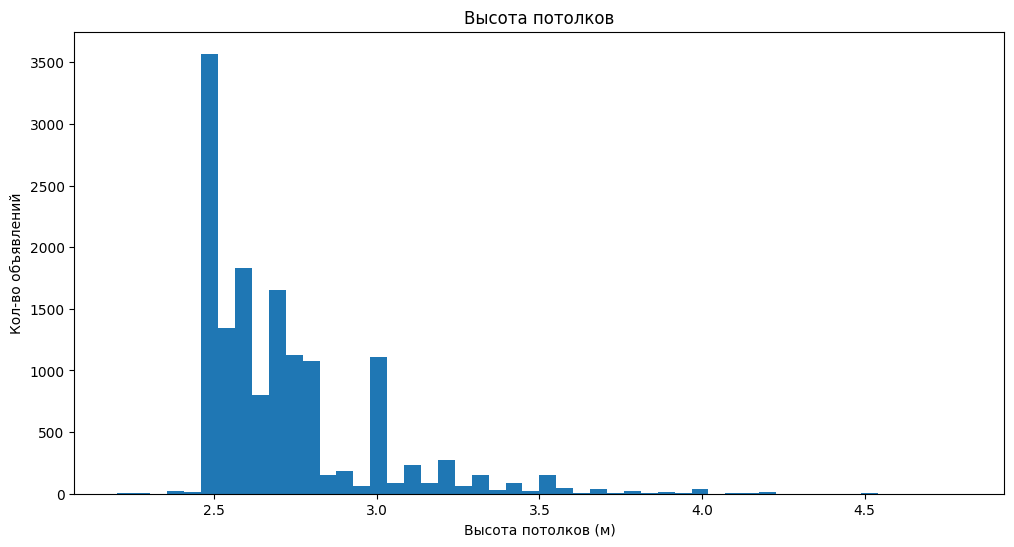

In [53]:
data['ceiling_height'].plot(kind='hist',
                        bins=50,
                        figsize=(12, 6),
                        title = 'Высота потолков',
                        legend = False
                       )
plt.xlabel('Высота потолков (м)')
plt.ylabel('Кол-во объявлений');

### Изучие параметров объектов

Общая площадь:

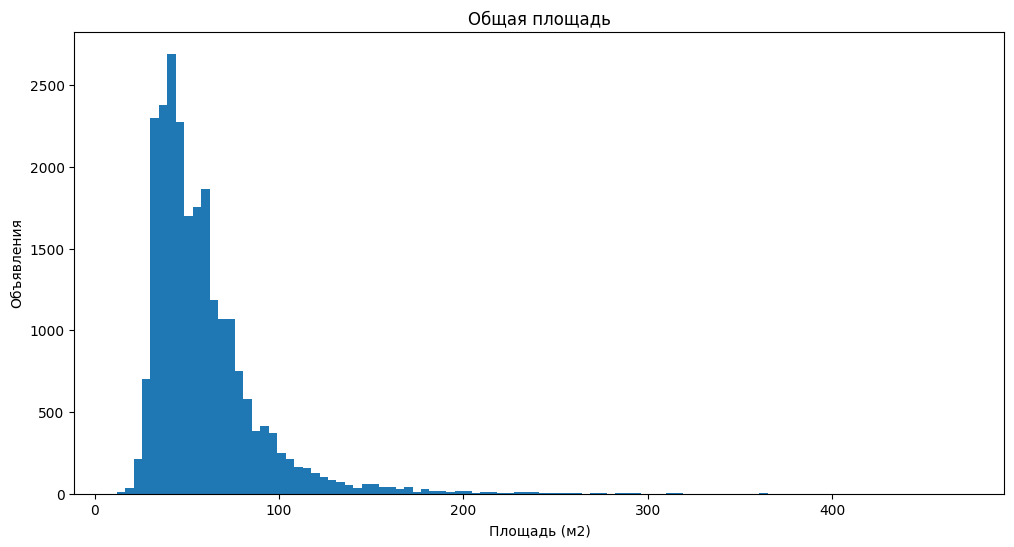

In [54]:
data['total_area'].plot(kind='hist',
                        bins=100,
                        figsize=(12, 6),
                        title='Общая площадь'
                        )
plt.xlabel('Площадь (м2)')
plt.ylabel('Объявления');

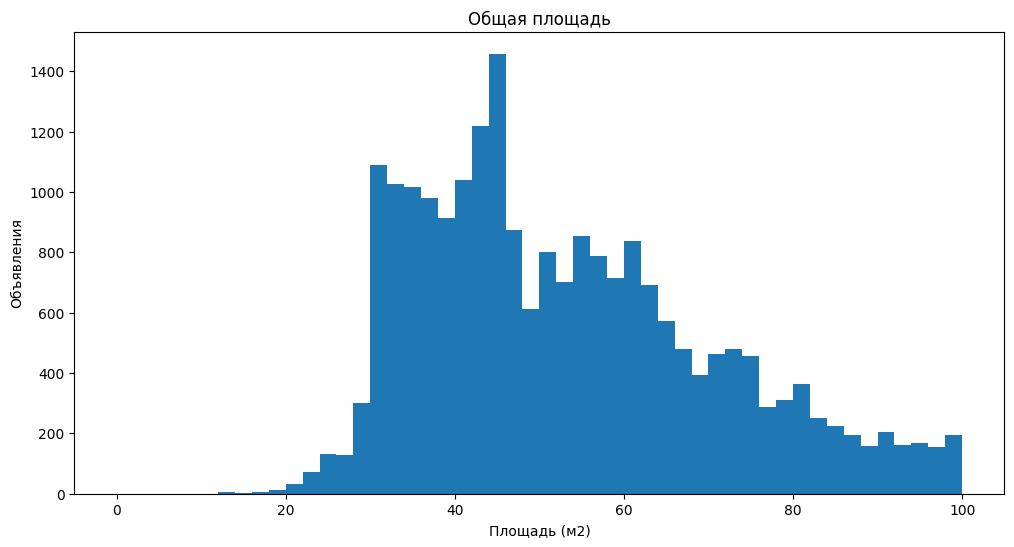

In [55]:
data['total_area'].plot(kind='hist',
                        bins=50,
                        figsize=(12, 6),
                        title='Общая площадь', range=(0, 100)
                        )
plt.xlabel('Площадь (м2)')
plt.ylabel('Объявления');

Основная часть объявлений укладывается в площадь до 100 м2. Также можно наблюдать несколько пиков, на более крупном масштабе видно, что они приходятся на приблизительно 30 и 45 квадратных метров - это логично, так как это стандарьная площадь массового жилья в РФ, в 1-комнатных и 2-комнатных квартирах соответственно. То же верно и для 3-комнатных квартир, в массовых панельных домах (напр. "хрущевка"), площадь таких квартир в районе 60 м2, что тоже видно на графике, от 50 до 60 м2 наблюдается третий пик. Хотя в выгрузке нет данных по серии и типу домов, ниже будет представлена таблица с разбивкой по этажам, и там будет два явных пика 5 и 9 этажей - стандартная этажность "хрущевок".
Так же в графике есть редкие выбросы до 400 м2, но в целом данные выглядят логично.

In [56]:
data.loc[(data['total_area'] > 25) & (data['total_area'] < 35)]['floors_total']

,floors_total
4,12.00
7,27.00
17,5.00
20,5.00
22,9.00
...,...
23464,5.00
23477,5.00
23478,9.00
23484,5.00


Жилая площадь:

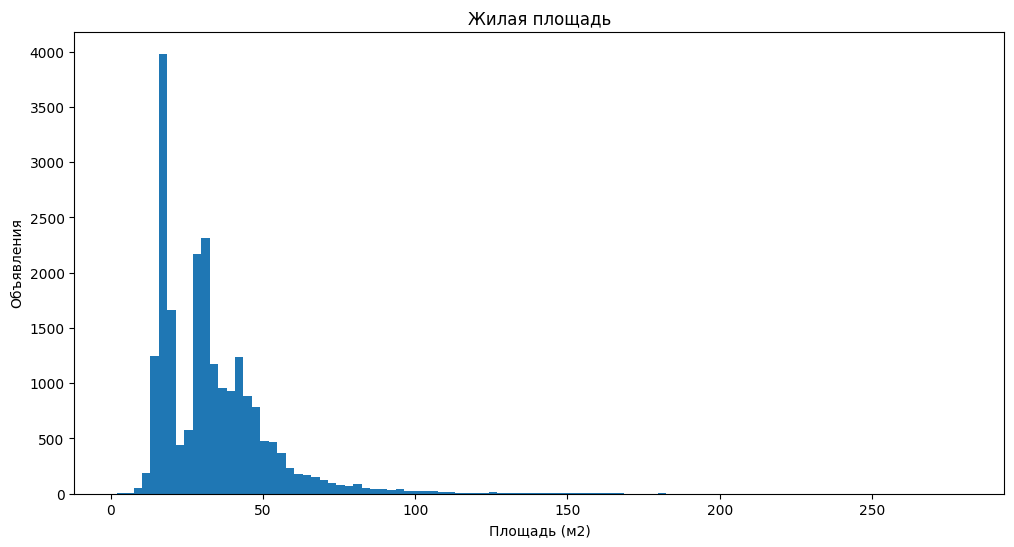

In [57]:
data['living_area'].plot(kind='hist',
                         bins=100,
                         figsize=(12, 6),
                         title='Жилая площадь'
                         )
plt.xlabel('Площадь (м2)')
plt.ylabel('Объявления');

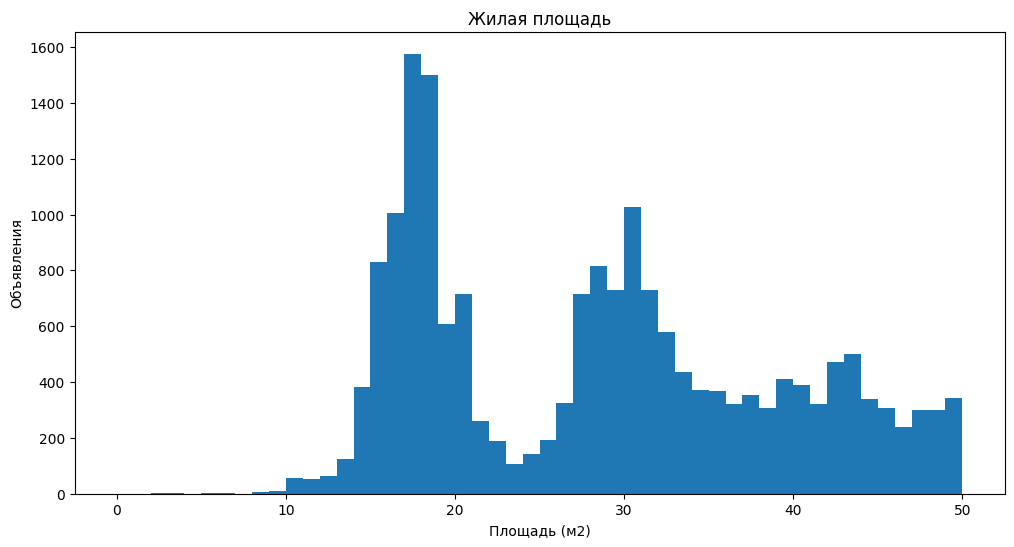

In [58]:
data['living_area'].plot(kind='hist',
                         bins=50,
                         figsize=(12, 6),
                         title='Жилая площадь',
                         range=(0, 50)
                         )
plt.xlabel('Площадь (м2)')
plt.ylabel('Объявления');

Данные бъются с таблтцей с общей площадью, ситуация аналогична, 16 и 30 м2 - стандартная жилая площадь для 1 и 2-комнатной "хрущевки" соответственно.

Площадь кухни:

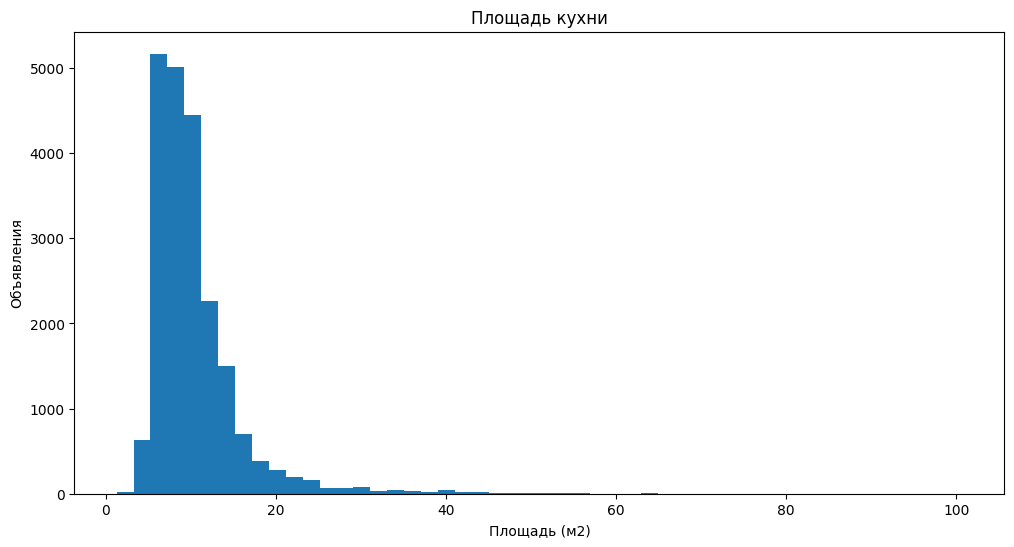

In [59]:
data['kitchen_area'].plot(kind='hist',
                          bins=50,
                          figsize=(12, 6),
                          title='Площадь кухни'
                          )
plt.xlabel('Площадь (м2)')
plt.ylabel('Объявления');

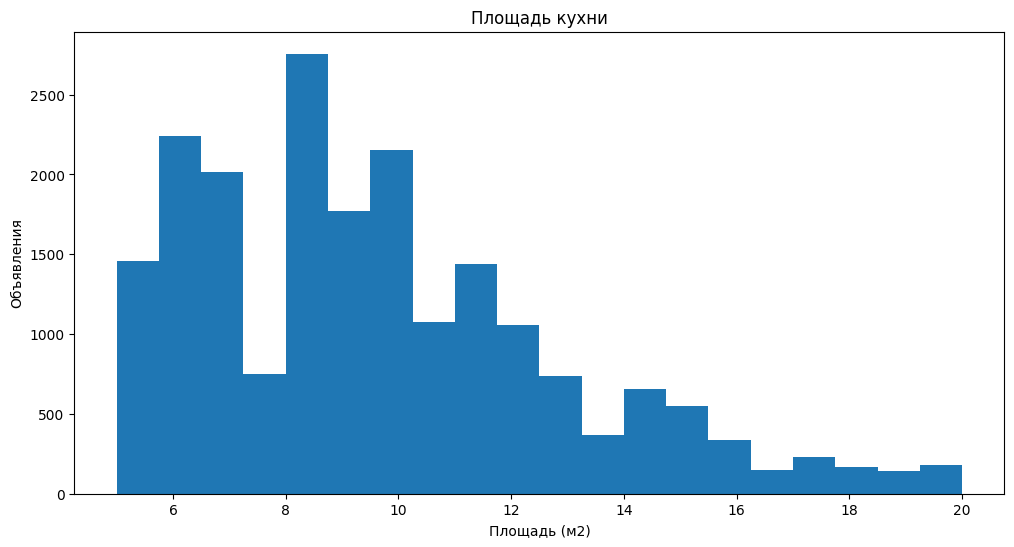

In [60]:
data['kitchen_area'].plot(kind='hist',
                          bins=20,
                          figsize=(12, 6),
                          title='Площадь кухни',
                          range=(5, 20)
                          )
plt.xlabel('Площадь (м2)')
plt.ylabel('Объявления');

Те же два пика, площадь кухни в районе 6 м2, свойственна "хрущевкам", а от 8 до 12, более новым сериям домов.

Цена объекта:

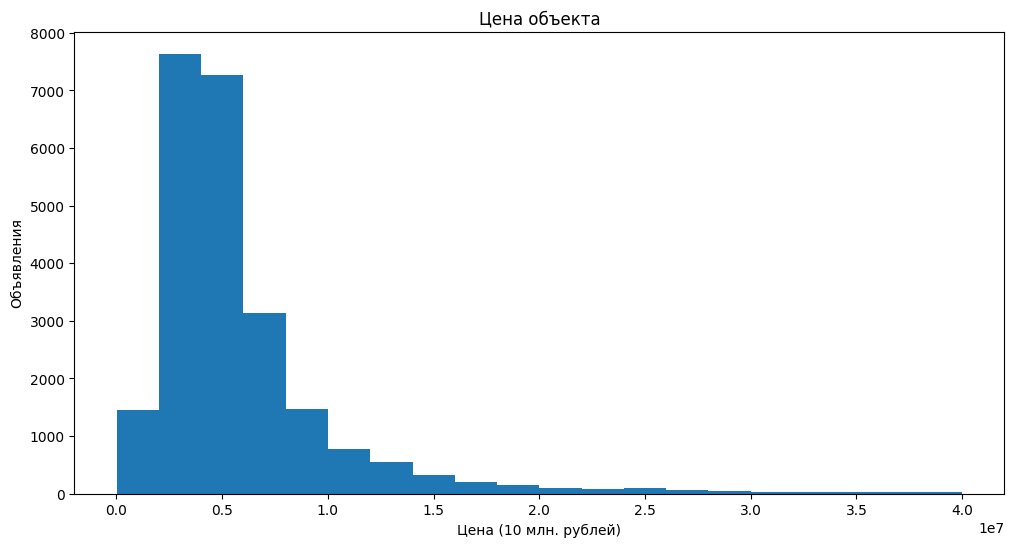

In [61]:
data['last_price'].plot(kind='hist',
                        bins=20,
                        figsize=(12, 6),
                        title='Цена объекта'
                        )
plt.xlabel('Цена (10 млн. рублей)')
plt.ylabel('Объявления');

Цена большенства объектов укладывается в 10 млн рублей. Чаще всего встречается цена от 3 до 6 млн.

Количество комнат:

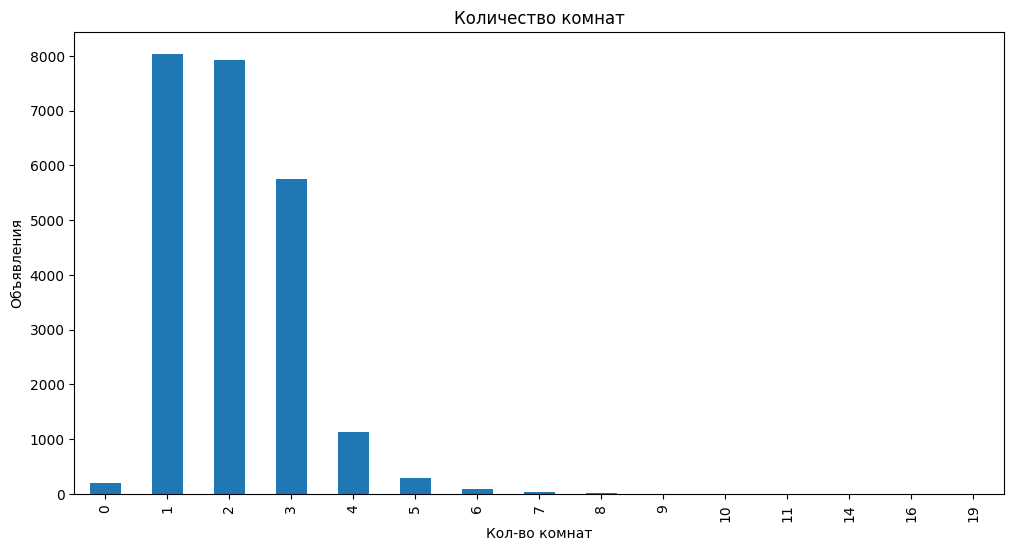

In [62]:
rooms_bar = data.pivot_table(index='rooms', values='total_images', aggfunc='count')
rooms_bar.plot(kind='bar',
               title='Количество комнат',
               figsize=(12, 6),
               legend=False
               )
plt.xlabel('Кол-во комнат')
plt.ylabel('Объявления');

На графике видно, что есть квартиры с 0 комнат, скорее всего это студии, проверим:

In [63]:
data.loc[(data['rooms'] == 0), 'studio'].value_counts()

,count
studio,
True,137
False,58


58 адресов не являються студиями и не имеют комнат, изучим их подробнее:

In [64]:
data.loc[(data['rooms'] == 0) & (data['studio'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m_price,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_km
346,4,"2,320,000.00",25.00,2017-09-27,0,NaN,14.00,17.00,1,False,False,True,NaN,0.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00,"92,800.00",2,9,2017,первый,NaN
502,0,"3,375,000.00",34.40,2017-03-28,0,NaN,26.00,24.30,19,False,False,True,NaN,1.00,посёлок Парголово,"53,115.00","19,292.00",0.00,NaN,1.00,593.00,430.00,"98,110.47",1,3,2017,другой,19.00
769,9,"2,600,000.00",26.10,2018-02-20,0,NaN,18.00,NaN,8,False,False,True,NaN,1.00,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.00,"99,616.86",1,2,2018,другой,NaN
826,14,"1,900,000.00",35.00,2017-04-14,0,2.70,5.00,15.00,3,False,False,True,NaN,1.00,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.00,"54,285.71",4,4,2017,другой,NaN
933,5,"2,200,000.00",23.00,2016-09-27,0,NaN,27.00,18.00,7,False,False,True,NaN,2.00,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.00,"95,652.17",1,9,2016,другой,NaN
1553,0,"2,200,000.00",22.00,2017-11-03,0,NaN,18.00,15.00,16,False,False,True,NaN,1.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.00,"100,000.00",4,11,2017,другой,NaN
1604,7,"1,980,000.00",23.98,2018-02-01,0,NaN,4.00,10.50,3,False,False,True,NaN,1.00,посёлок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.00,"82,568.81",3,2,2018,другой,NaN
2502,5,"3,500,000.00",27.10,2018-02-01,0,NaN,18.00,18.70,9,False,False,True,NaN,2.00,Санкт-Петербург,"32,036.00","8,175.00",0.00,NaN,1.00,644.00,70.00,"129,151.29",3,2,2018,другой,8.00
2986,18,"2,100,000.00",24.00,2017-11-10,0,NaN,10.00,18.00,6,False,False,True,NaN,2.00,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.00,"87,500.00",4,11,2017,другой,NaN
4079,7,"2,600,000.00",24.00,2018-02-01,0,NaN,25.00,18.00,4,False,False,True,NaN,2.00,Санкт-Петербург,"10,031.00","13,330.00",1.00,915.00,0.00,NaN,42.00,"108,333.33",3,2,2018,другой,13.00


Судя по общей площади объекта, по маленькой либо отсутствующей площади кухни, можно сделать вывод, что была допущена ошибка со стороны пользователей и эти объявления относятся к студиям, исправим значение в поле `studio` на `True`:

In [65]:
data.loc[(data['rooms'] == 0) & (data['studio'] == False), 'studio'] = True
data.loc[(data['rooms'] == 0)]['studio'].value_counts()

,count
studio,
True,195


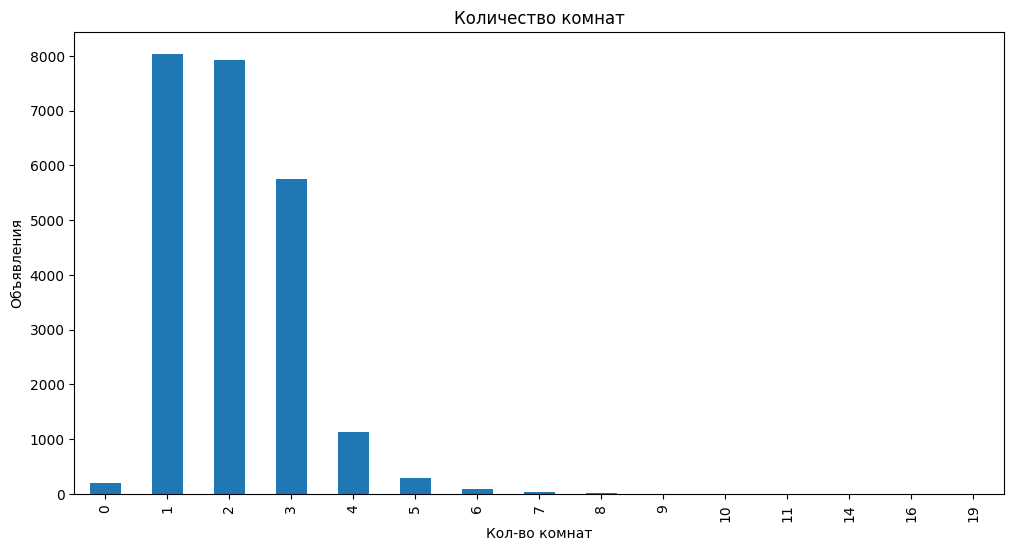

In [66]:
rooms_bar = data.pivot_table(index='rooms', values='total_images', aggfunc='count')
rooms_bar.plot(kind='bar',
               title='Количество комнат',
               figsize=(12, 6),
               legend = False
               )
plt.xlabel('Кол-во комнат')
plt.ylabel('Объявления');

Данные выглядят логично и не протеворечат предыдущим графикам, 1 и 2-комнатных квартир действительно больше чем остальных.

Высота потолков:

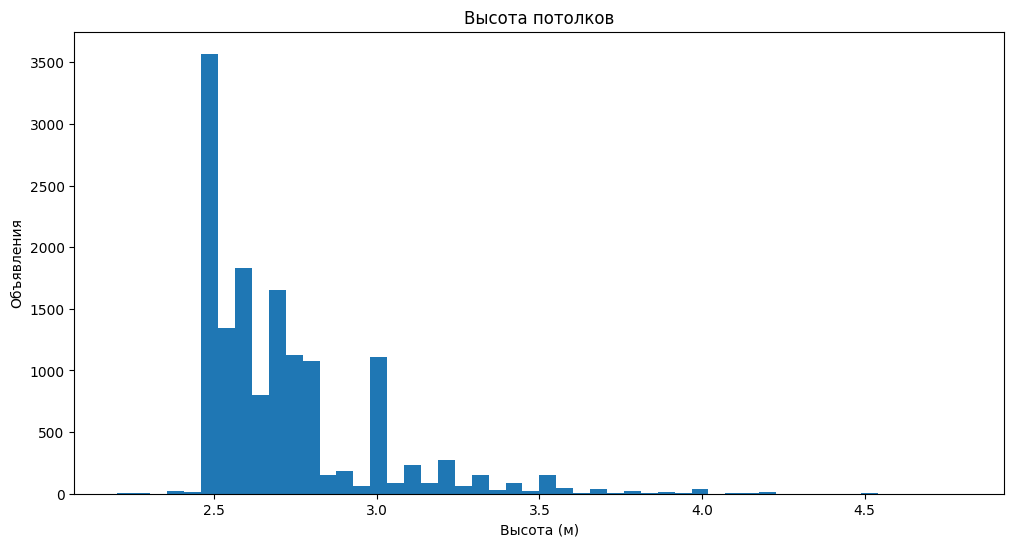

In [67]:
data['ceiling_height'].plot(kind='hist',
                            bins=50,
                            figsize=(12, 6),
                            title='Высота потолков')
plt.xlabel('Высота (м)')
plt.ylabel('Объявления');

Различные пики могут свидетельствовать об определенной серии домов или просто об округлении со стороны пользователей высоты до 2,5 и 3 метров.

Тип этажа:

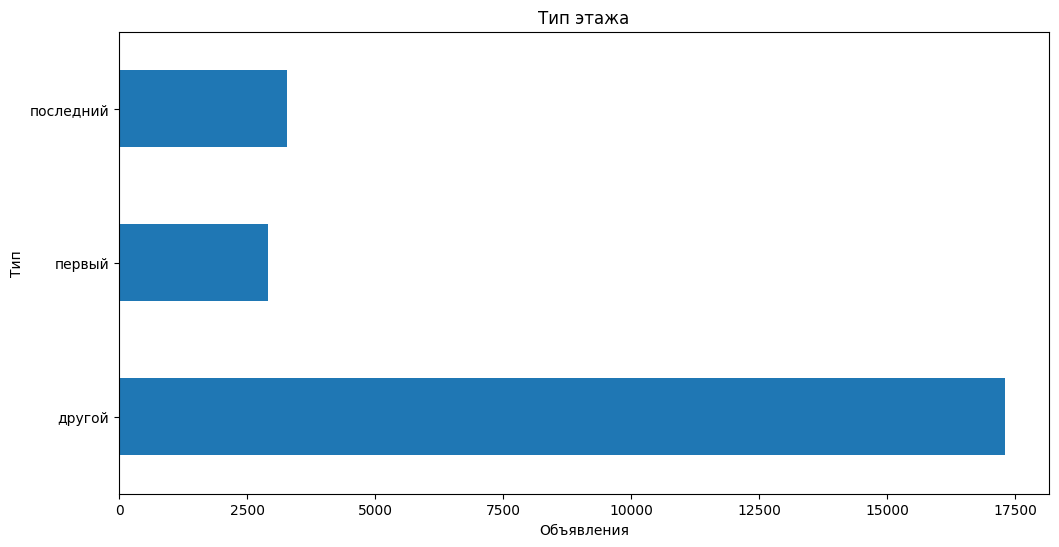

In [68]:
floor_type_bar = data.pivot_table(index='floor_type', values='total_images', aggfunc='count')
floor_type_bar.plot(kind='barh',
                    figsize=(12, 6),
                    title='Тип этажа',
                    legend = False
                    )
plt.xlabel('Объявления')
plt.ylabel('Тип');

В данных нет никаких аномалий, количество первых и последний этажей сопоставимо и в несколько раз меньше категории `другой`.

Количество этажей:

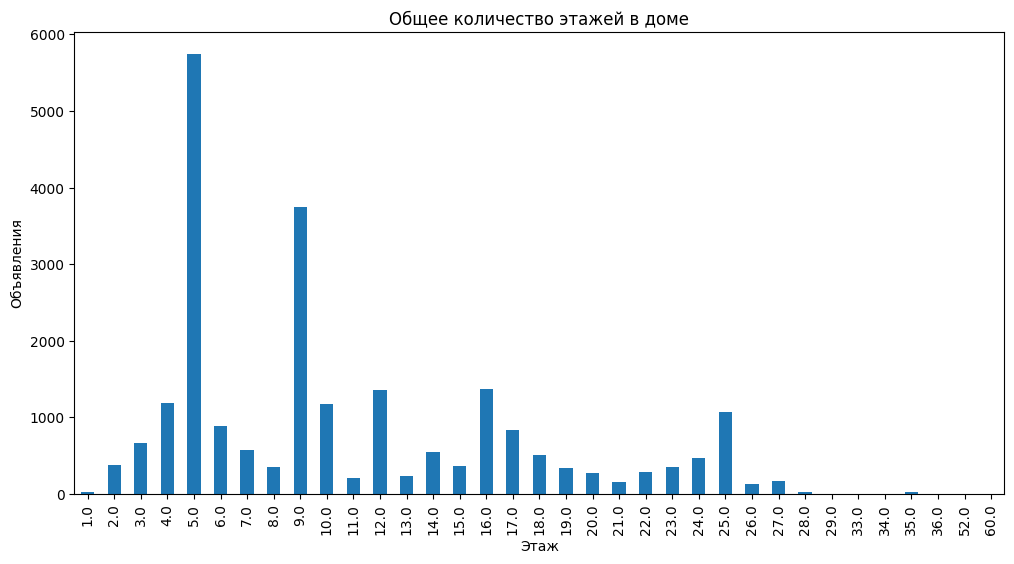

In [69]:
floors_total_bar = data.pivot_table(index='floors_total', values='total_images', aggfunc='count')
floors_total_bar.plot(kind='bar',
                      figsize=(12, 6),
                      title='Общее количество этажей в доме',
                      legend = False
                      )
plt.xlabel('Этаж')
plt.ylabel('Объявления');

Как и писалось выше, пики в районе 5 и 9 этажей объясняються большой распространенностью "хрущевок", для которых свойственна данная этажность, в пользу этой гипотезы говорят аналогичные пики в графиках с площадью, свойственной тем же "хрущевкам". На графике отсутствуют аномально высокие показатели, данные выглядят логично.   

Удаление от центра:

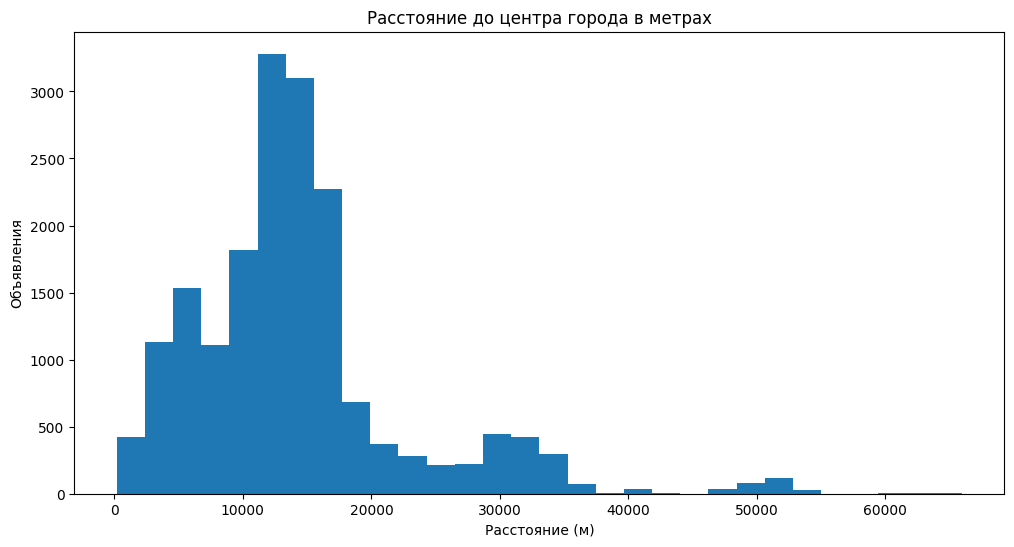

In [70]:
data['city_centers_nearest'].plot(kind='hist',
                                  figsize=(12, 6),
                                  bins=30,
                                  title='Расстояние до центра города в метрах'
                                  )
plt.xlabel('Расстояние (м)')
plt.ylabel('Объявления');

Основной пик приходится до 20 км, что логично, но данные выглядят странно, есть показатели больше 60 км, но в Ленобласти нет городов с таким большим радиусом, возможно расстояние у некоторых объектов в области указано до центра Санкт-Петербура, что вызывает вопросы к автоматической системе получения картографических данных.

Расстояние до парков:

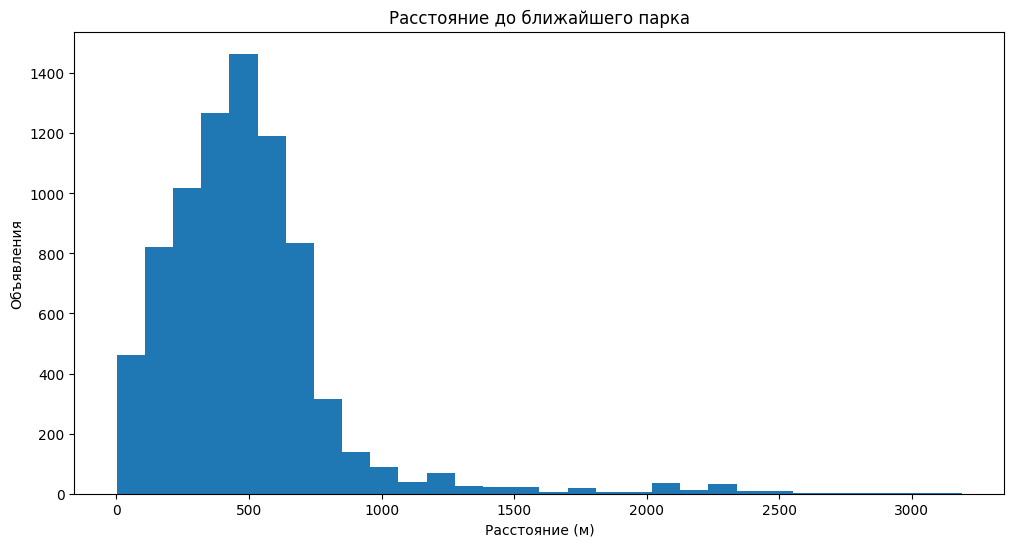

In [71]:
data['parks_nearest'].plot(kind='hist',
                           figsize=(12, 6),
                           bins=30,
                           title='Расстояние до ближайшего парка'
                           )
plt.xlabel('Расстояние (м)')
plt.ylabel('Объявления');

На графике видно, что большенство объектов находится в радиусе полукилометра от близжайших парков, объекты на удалении больше 1 км от парков встречаются редко. Данные выглядят логично.

### Скорость продажи квартир

In [72]:
data['days_exposition'].describe()

,days_exposition
count,"20,357.00"
mean,179.89
std,218.88
min,1.00
25%,45.00
50%,95.00
75%,230.00
max,"1,580.00"


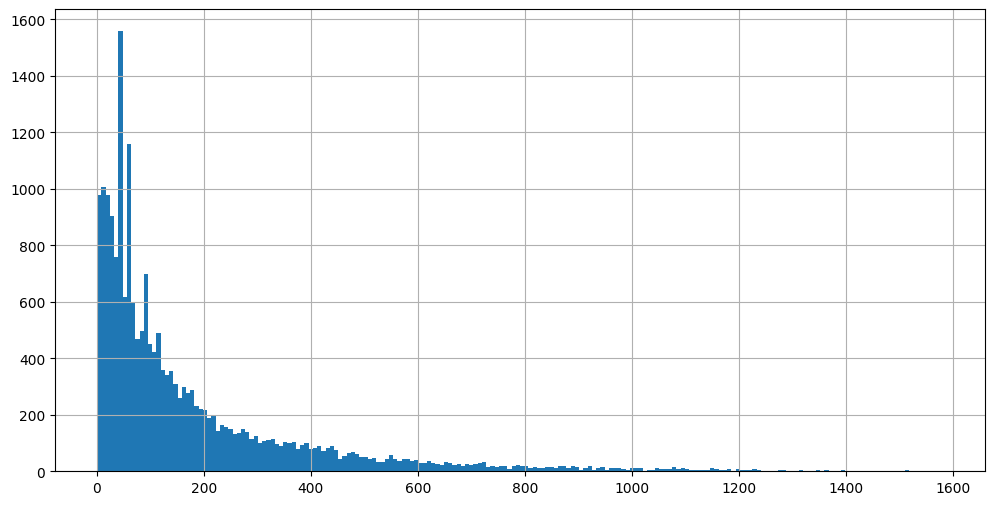

In [73]:
data['days_exposition'].hist(bins=200, figsize=(12, 6));

В интервале от 0 до 100 есть несколько больших пиков, увеличим масштаб:

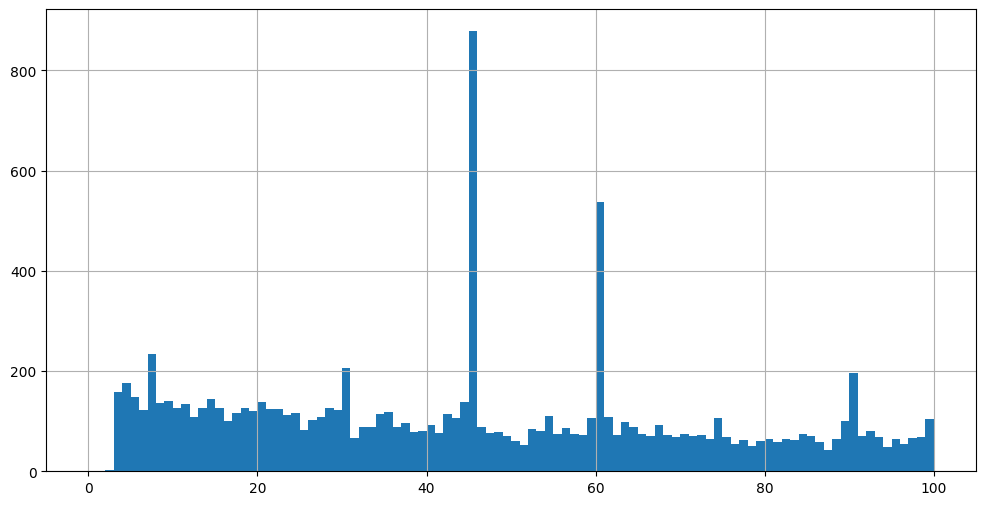

In [74]:
data['days_exposition'].hist(bins=100, figsize=(12, 6), range=(0, 100));

Можно выделить 6 пиков, на 7, 30, 45, 60, 90 и небольшой пик на 75 дне, после 30 дня, через каждые 15 дней наблюдаются различные пики, самый огромный видно на 45 дне и еще один на 60.

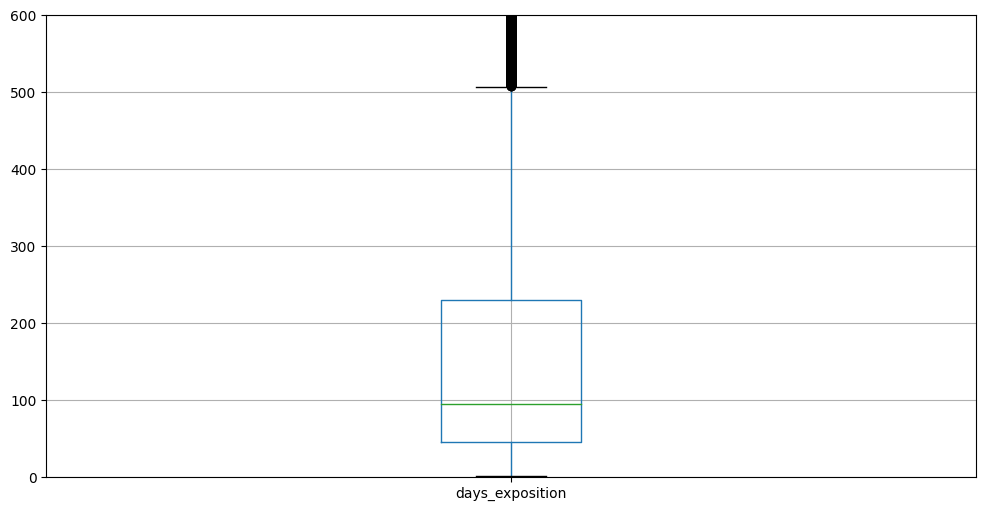

In [75]:
data.boxplot('days_exposition', figsize=(12, 6))
plt.ylim(0, 600);

Основные продажи квартир приходятся на первые 250 дней, необычайно быстрой, можно считать продажу до 50 дней, долгой от 250 до 550 дней, а необычайно долгой от 550 дней. Также есть некие аномалии, начиная с 30 по 90 день, каждые 15 дней наблюдаються пики продаж, особенно в 45 и 60 дни. Природа пиков не ясна.

### Факторы, сильно влияющие, на общую стоимость объекта

Создадим датафрейм из факторов, перечисленных в задании:

In [76]:
price_factors_data = data[
    ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms',
     'floor_type', 'weekday_exposition', 'month_exposition', 'year_exposition']
]

Построим таблицы по категориальным признакам, для удобства определим свою функцию для построения графиков:

In [77]:
def plot_catt_price(index, title, xlabel, ylabel, kind='bar', sort=False):
    try:
        res_bar = (
        price_factors_data
        .pivot_table(
            index=index,
            values='last_price',
            aggfunc='median'
        )
        )

        if sort:
            res_bar.sort_values(by='last_price', inplace=True)

        res_bar.plot(
            kind=kind,
            figsize=(12, 6),
            rot = 0,
            title=title,
            xlabel=xlabel,
            ylabel=ylabel,
            legend=False
        )

        return res_bar

    except:
        return 'Ошибка'


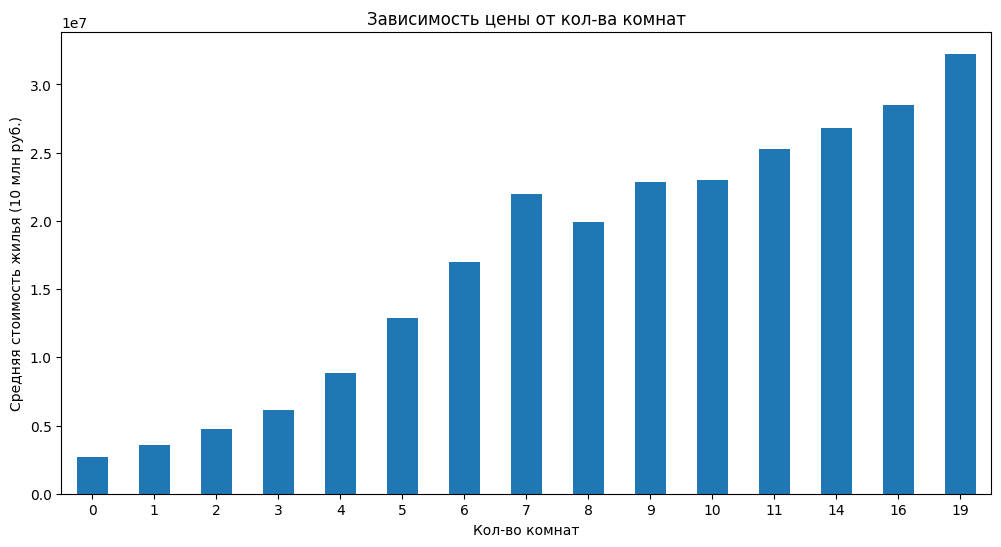

In [78]:
plot_catt_price(
    index='rooms',
    title='Зависимость цены от кол-ва комнат',
    xlabel='Кол-во комнат',
    ylabel='Средняя стоимость жилья (10 млн руб.)'
);

Количество комнат сильно влияет на стоимость жилья - чем больше комнат, тем выше стоимость.

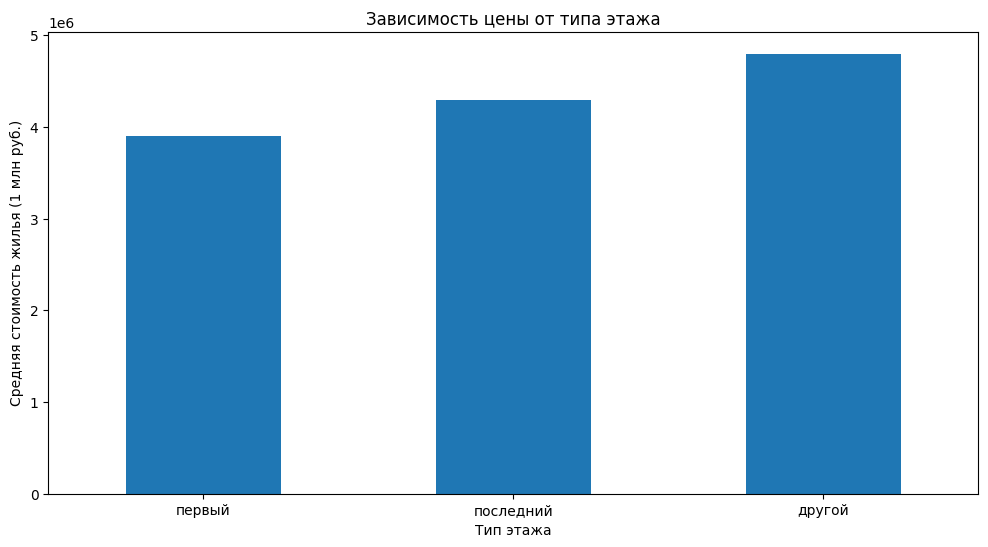

In [79]:
plot_catt_price(
    index='floor_type',
    title='Зависимость цены от типа этажа',
    xlabel='Тип этажа',
    ylabel='Средняя стоимость жилья (1 млн руб.)',
    sort=True
);

Самые дешевые объекты находятся на первом этаже, за ними идут объекты на последнем этаже. Объекты между первым и последним, в среднем, приблизительно на 20% дороже чем на первом и на 10% чем на последнем.

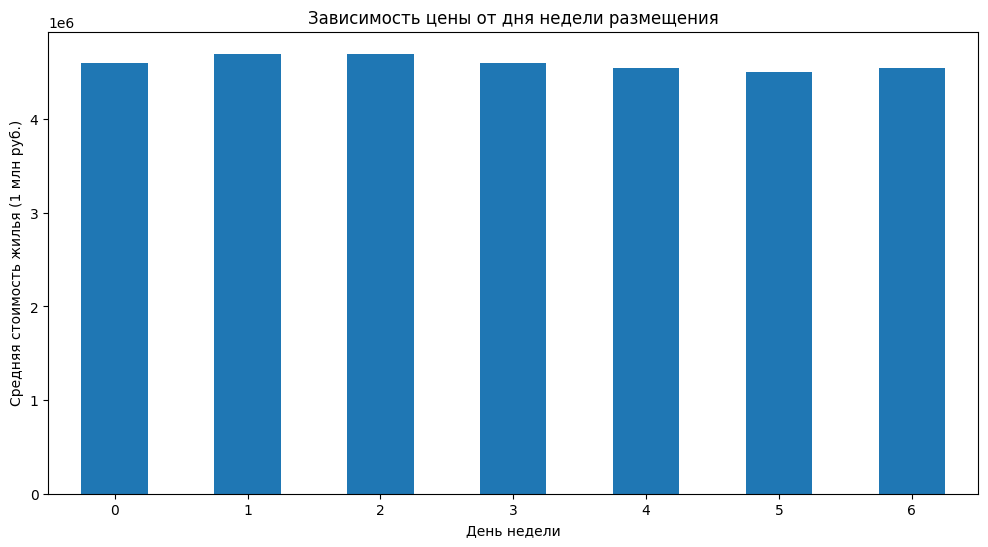

In [80]:
plot_catt_price(
    index='weekday_exposition',
    title='Зависимость цены от дня недели размещения',
    xlabel='День недели',
    ylabel='Средняя стоимость жилья (1 млн руб.)'
);

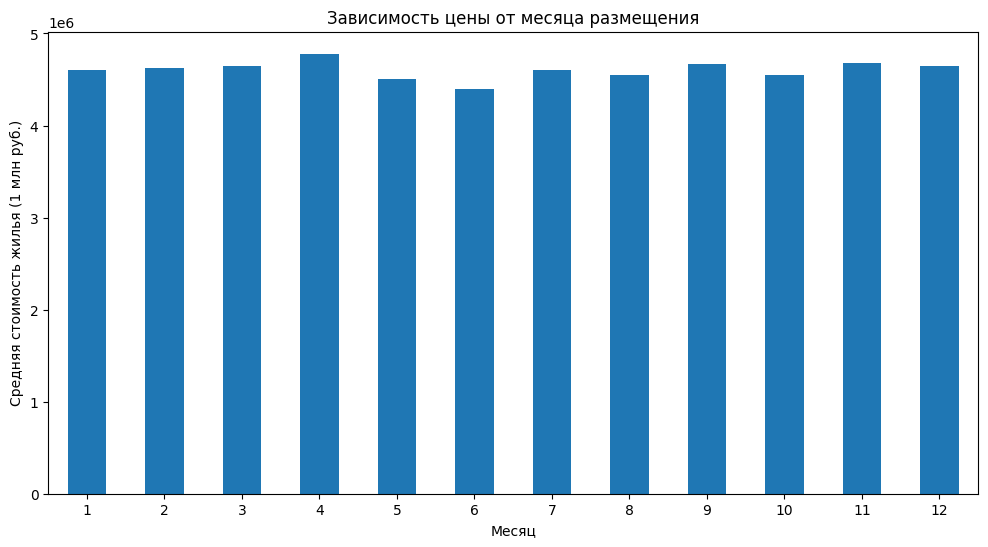

In [81]:
plot_catt_price(
    index='month_exposition',
    title='Зависимость цены от месяца размещения',
    xlabel='Месяц',
    ylabel='Средняя стоимость жилья (1 млн руб.)'
);

День недели и месяц размещения почти никак не влияют на стоимость объектов.

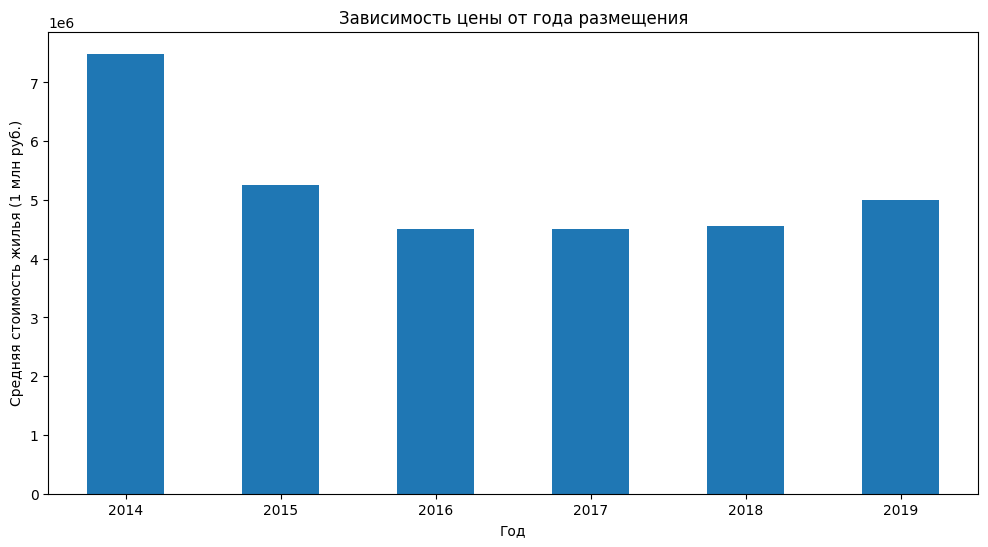

In [82]:
plot_catt_price(
    index='year_exposition',
    title='Зависимость цены от года размещения',
    xlabel='Год',
    ylabel='Средняя стоимость жилья (1 млн руб.)'
);

С 2014 по 2016 наблюдается резкое падение стоимости жилья, приблизительно на 30-35%, с 2016 по 2018, средняя стоимость почти не менялась, а с 2019 наблюдается небольшой рост.

Для количественных признаков создадим диаграммы рассеяния и выведем коэффицент корреляции под ними:

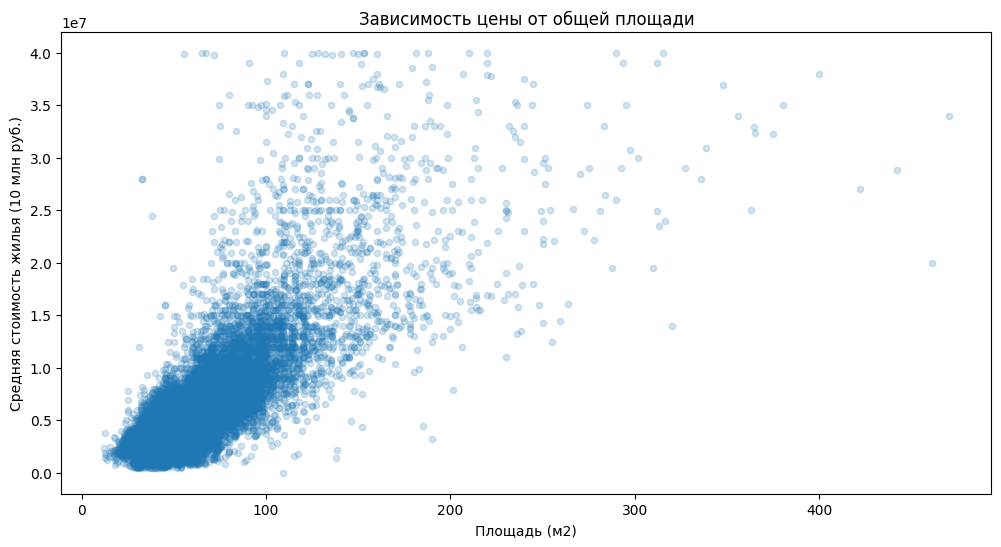

In [83]:
price_factors_data.plot(
    x='total_area',
    y='last_price',
    kind='scatter',
    title='Зависимость цены от общей площади',
    xlabel='Площадь (м2)',
    ylabel='Средняя стоимость жилья (10 млн руб.)',
    figsize=(12, 6),
    alpha=0.2,
);

In [84]:
price_factors_data['total_area'].corr(price_factors_data['last_price'])

0.7865122862466112

Коэффицент корреляции между стоимостью жилья и общей площадью составляет 78,7% - это говорит о почти прямом зависимости стоимости жилья от общей площади - чем выше общая площадь, тем дороже жильё.

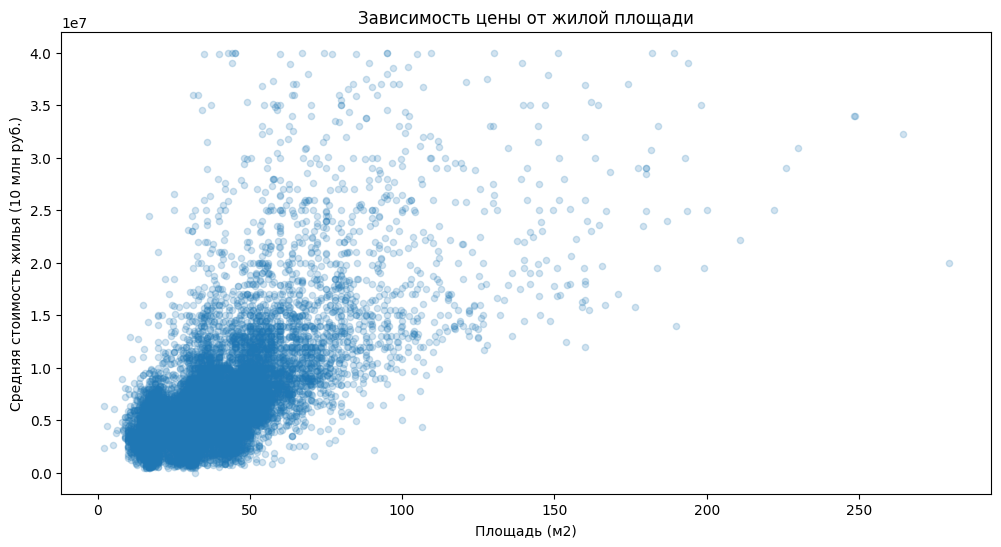

In [85]:
price_factors_data.plot(
    x='living_area',
    y='last_price',
    kind='scatter',
    title='Зависимость цены от жилой площади',
    xlabel='Площадь (м2)',
    ylabel='Средняя стоимость жилья (10 млн руб.)',
    figsize=(12, 6),
    alpha=0.2,
);

In [86]:
price_factors_data['living_area'].corr(price_factors_data['last_price'])

0.6931017353732879

Жилая площадь сильно влияет на итоговую стоимость объекта, коэффицент корреляции 69,3%, однако не так сильно как общая площадь.

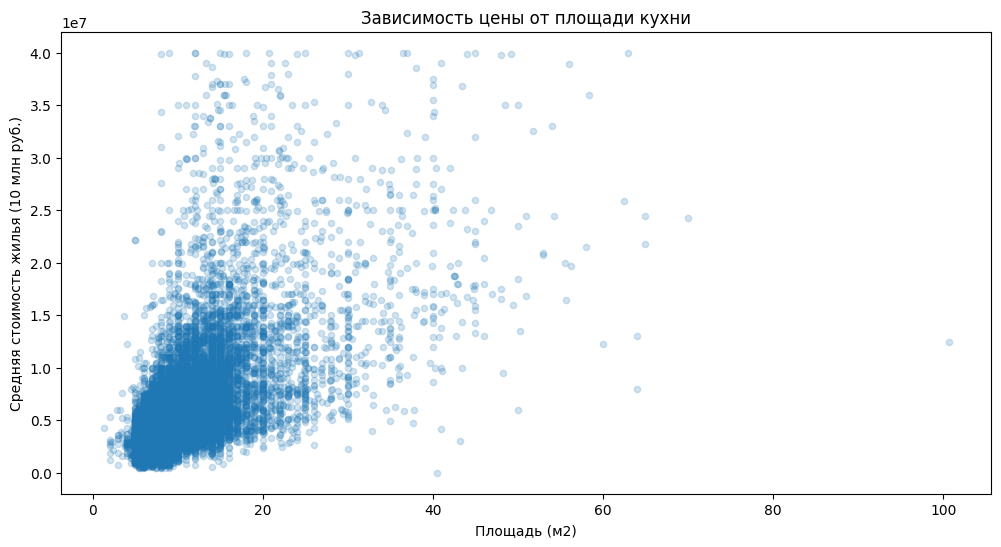

In [87]:
price_factors_data.plot(
    x='kitchen_area',
    y='last_price',
    kind='scatter',
    title='Зависимость цены от площади кухни',
    xlabel='Площадь (м2)',
    ylabel='Средняя стоимость жилья (10 млн руб.)',
    figsize=(12, 6),
    alpha=0.2,
);

In [88]:
price_factors_data['kitchen_area'].corr(price_factors_data['last_price'])

0.603920736470372

Площадь кухни значительно оказывает влияние на стоимость жилья, но уже не так сильно как общая и жилая площади, - коэффицент корреляции 60,4%.

Сильнее всего влияют на итоговую стоимость объектов недвижимости общая площадь и количество комнат, логично предположить, что оба этих признака почти напрямую зависят друг от друга. Также сильно влияют на стоимость квартир жилая площадь, площадь кухни и тип этажа. День и месяц публикации не оказывают никакого влияния на стоимость. С 2014 по 2016 год наблюдалось резкое падение стоимости жилья, на 30-35%. С 2019 наблюдается небольшой рост.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [89]:
f_df = data.pivot_table(index='locality_name', values='total_images', aggfunc='count') #Количество объявлений по названию нп.
s_df = data.pivot_table(index='locality_name', values='m_price') #Средняя цена за м2 по названию нп.
top_10 = f_df.join(s_df)
top_10.columns = ['Кол-во объявлений', 'Средняя цена за м2']
top_10 = top_10.sort_values('Кол-во объявлений', ascending=False).head(10).sort_values('Средняя цена за м2', ascending=False)
top_10

,Кол-во объявлений,Средняя цена за м2
locality_name,,
Санкт-Петербург,15527,"111,652.14"
Пушкин,368,"103,100.89"
деревня Кудрово,299,"92,473.55"
посёлок Парголово,327,"90,175.91"
Мурино,590,"86,087.51"
посёлок Шушары,440,"78,677.36"
Колпино,338,"75,424.58"
Гатчина,307,"68,746.15"
Всеволожск,397,"68,719.32"


Из ТОП 10 самая высокая средняя цена за квадратный метр у Санкт-Петербурга - это 111 652 рубля, а самая низкая средняя цена у Выборга - 58 238 рублей.

### Cредняя стоимость на разном удалении от центра в Санкт-Петербурге

Средняя цена по километрам от центра:

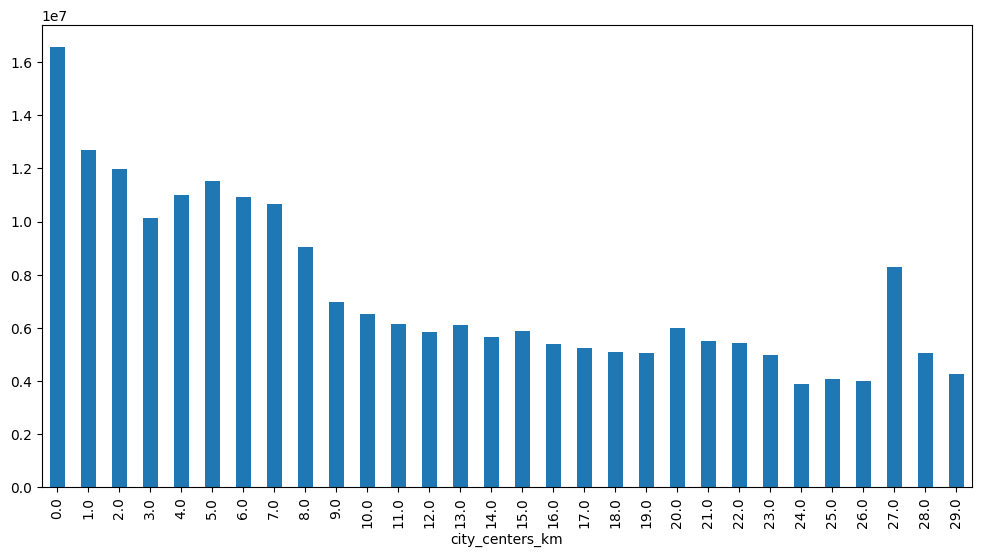

In [90]:
spb_km_price = data.query('locality_name == "Санкт-Петербург"')
spb_km_price.dropna(subset=['city_centers_km'])
spb_km_price = spb_km_price.pivot_table(index='city_centers_km', values='last_price')
spb_km_price.plot(kind='bar', figsize=(12, 6), legend=False);

Количество объявлений по километрам от центра:

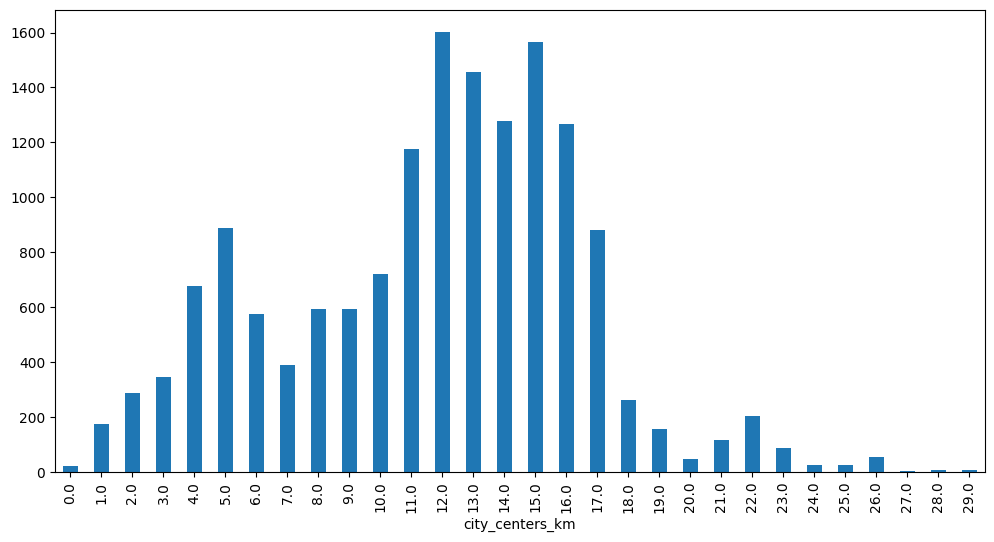

In [91]:
spb_km_price_count = data.query('locality_name == "Санкт-Петербург"')
spb_km_price_count.dropna(subset=['city_centers_km'])
spb_km_price_count = spb_km_price_count.pivot_table(index='city_centers_km', values='last_price', aggfunc='count')
spb_km_price_count.plot(kind='bar', figsize=(12, 6), legend=False);

Выброс цены на 27 км:

In [92]:
data.query('locality_name == "Санкт-Петербург" & city_centers_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m_price,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_km
737,13,"14,350,000.00",74.00,2017-11-28,2,3.13,5.00,30.00,3,False,False,False,25.00,0.00,Санкт-Петербург,"23,888.00","27,313.00",1.00,"1,496.00",0.00,NaN,128.00,"193,918.92",1,11,2017,другой,27.00
5909,6,"2,250,000.00",32.00,2018-02-27,1,NaN,2.00,16.50,2,False,False,False,7.00,0.00,Санкт-Петербург,"24,006.00","27,431.00",0.00,NaN,0.00,NaN,178.00,"70,312.50",1,2,2018,последний,27.00


Количество объявлений после 23 км:

In [93]:
len(data.query('locality_name == "Санкт-Петербург" & city_centers_km > 23'))

120

Выборка слишком неоднородна, чем дальше от центра тем больше объявлений - это логично, так как больше радиус охвата, однако к 29 километрам число объявлений стремится к нулю, наблюдается большой скачок средней цены на 27 километре, там всего два объявления на 14 350 000 рублей и на 2 250 000 рублей. После 23 километров всего 120 объявлений, имеет смысл их отбросить так как - это меньше одной сотой процента от общего количества объявлений (15 527 шт.) и не дает никакой объективной информации.

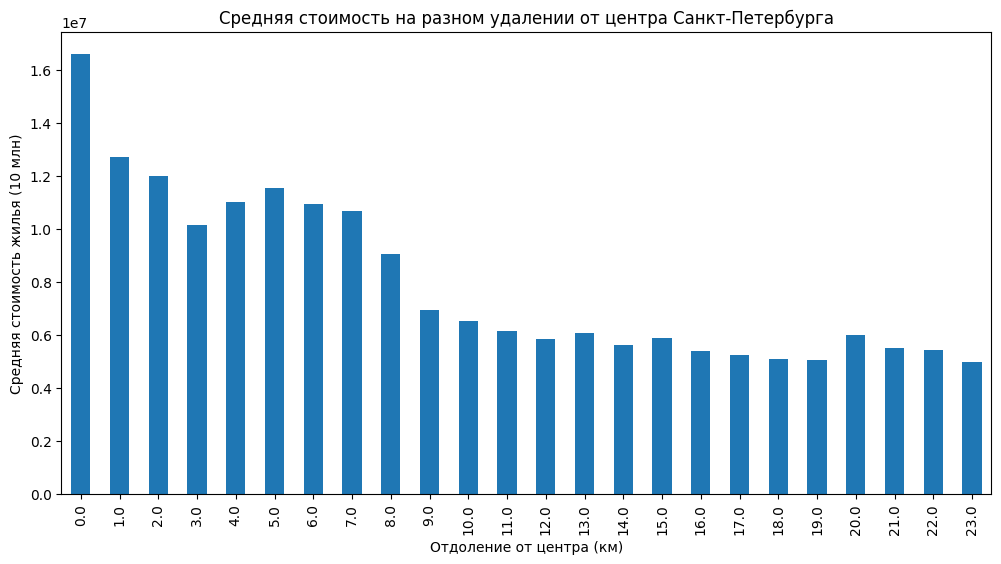

In [94]:
spb_km_price.query('city_centers_km < 24').plot(
    kind='bar',
    figsize=(12, 6),
    title = 'Средняя стоимость на разном удалении от центра Санкт-Петербурга',
    xlabel = 'Отдоление от центра (км)',
    ylabel = 'Средняя стоимость жилья (10 млн)',
    legend = False,
);


Цена в радиусе до одного км (центр):

In [95]:
center_spb = int(spb_km_price.query('city_centers_km == 0').iloc[0]['last_price'])
center_spb

16592877

Цена в радиусе от 23 до 24 км (окрайна):

In [96]:
outskirts_spb = int(spb_km_price.query('city_centers_km == 23').iloc[0]['last_price'])
outskirts_spb

4985376

Разница от ценрта к окрайне (%):

In [97]:
(1 - outskirts_spb / center_spb) * 100

69.954722137698

Ожидаемо в центре самая высокая цена на жилье, в сренем около 16 500 000 рублей за объект. Дальше от центра, от километра к километру, стоимость падает, однако не равномерно, виной этому могут быть как особенности географии города, так и неоднородная выборка. Но в целом тенденция на снижение цены к окрайне города, вплоть до 70%, в среднем минус 3% к стоимости за каждый километр от центра.  

### Вывод

На данном этапе были изучены основные параметры:
- Аномальные значения вызваны выбросами, в случае со стоимостью жилья или не правильным заполнением полей со стороны пользователя, в случае с высотой потолков.
- Пропуски в технических характеристиках объекта (площади, этажность, высота), нельзя логически заполниить, их пропуски скорее всего связаны с необязательностью заполнения данных полей.
- Cамая большая доля объявлений приходится на 1 - 2 комнатные квартры в 5 - 9 этажных домах, с площадью до 50 м2, предположительно "хрущквки".
- Основные продажи квартир приходятся на первые 250 дней, в очень редких случиях объявления могут вистеть дольше полутора лет.
- Общая площадь и количество комнат сильнее всего влияют на итоговую стоимость объектов недвижимости. Также сильно влияют на стоимость квартир жилая площадь, площадь кухни и тип этажа. День и месяц публикации не оказывают никакого влияния на стоимость. С 2014 по 2016 год наблюдалось резкое падение стоимости жилья, на 30-35%. Однако с 2019 года наблюдается небольшой рост.
- Стоимость жилья в Санкт-Петербурге снижается от центра к окрайне города, вплоть до 70%, в среднем по 3% за каждый километр от центра.

## Общий вывод

Было проведено исследование на основе данных из архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет от сервиса Яндекс Недвижимость.

На этапе предобработки данных был выявлен ряд проблем с качеством сбора данных:
- Не заполненные поля
- Неявные дубликаты в названиях населенных пунктов
- Аномальные данные от пользователей
- Не правильный тип данных
- Большое количество пропусков в геоданных

На этапе исследовательского анализа данных было выявленно:
- Больше всего на стоимость влияет общая площадь жилья и количество комнат, затем жилая площадь, площадь кухни и тип этажа, день недели и месяц размещения объявления не влияют на стоимость. С 2014 года по 2016 год наблюдалось резкое снижение цены на жилье, порядка 30%. С 2016 по 2018 годы было плато, цена почти не менялась, а в 2019 немного пошла вверх.
- Основные продажи квартир приходятся на первые 250 дней, необычайно быстрой, можно считать продажу до 50 дней, долгой от 250 до 550 дней, а необычайно долгой от 550 дней.
- Средняя стоимость жилья в центре Санкт-Петербурга составляет 16,5 млн. рублей, а на окрайне 5 млн. рублей, разница в 70 %.
- Жилье в Санкт-Петербурге дешевеет на 3% с удалением на каждый километр от центра города.

"Типичная" квартира в объявлении Яндекс Недвижимости в Санкт-Петербурге и соседних населённых пунктах исходя из проведенного анализа:
- Количество комнат: 2 шт.
- Общая площадь: 45 м2.
- Жилая площадь: 29 м2.
- Площадь кухни: 9 м2.
- Этажность дома: 5 этажей.
- Расстояние от центра: 10-15 км.

Для решения проблем с аномальными значениями и пропусками следует сделать обязательными к заполнению поля для площади, этажности, высоты потолков. Стоит рассмотреть возможность ограниченния значений указания высоты потолков. Можно было бы автоматизировать заполнение ряда параметров, введя колонки с серией домов и их параметрами. Для решения проблемы с неявными дубликатами адресов, следует стандартизировать написание топонимов населенных пунктов. Также следует доработать систему автоматического получения геоданных.
